In [1]:
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np

sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from src.dataset.dataset import SimpleIterDataset
from src.utils.train_utils import to_filelist
from torch.utils.data import DataLoader
#import dgl  # CPU only version for now
from tqdm import tqdm
from torch_scatter import scatter_sum
import matplotlib.pyplot as plt
import pickle
import numpy as np
import mplhep as hep


hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=13)


/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
dic_time = np.load("/eos/experiment/fcc/ee/datasets/DC_tracking/Pythia/scratch/Zcard_CLD_background_IDEA_o1_v03_v8/1/d_IDEA_o1_v03_v4_overlay_MC.npy", allow_pickle=True).item()

<module 'matplotlib.pyplot' from '/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/matplotlib/pyplot.py'>

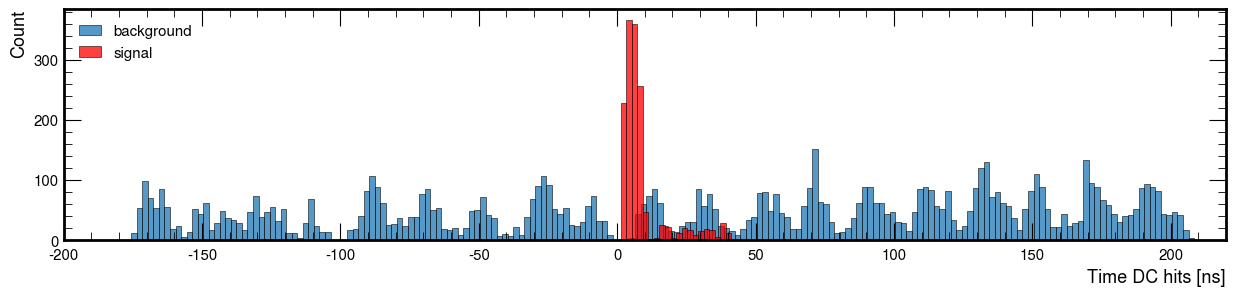

In [33]:
import seaborn as sns
mask = (1*np.array(dic_time["isoverlay_hit"]))>0
mask_s = (1*np.array(dic_time["isoverlay_hit"]))==0
plt.figure(figsize=(15,3))
# sns.histplot(dic_time["time"], binwidth=2, label="base")
sns.histplot(np.array(dic_time["time_hit"])[mask], binwidth=2, label="background")
sns.histplot(np.array(dic_time["time_hit"])[mask_s], binwidth=2, color="red", label="signal")
plt.legend(loc="upper left")
plt.xlabel("Time DC hits [ns]")
plt.xlim([-200,220])
plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-200.0, 250.0)

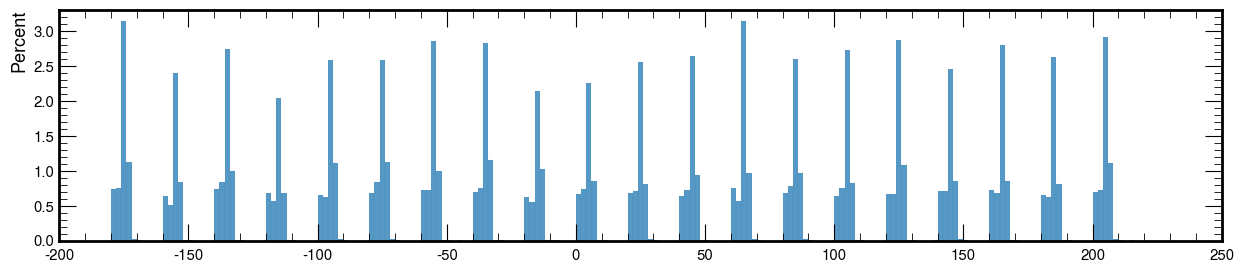

In [28]:
mask = (1*np.array(dic_time["is_overlay_MC"]))>0
plt.figure(figsize=(15,3))
sns.histplot(np.array(dic_time["time_MC_overlay"])[mask], binwidth=2, stat="percent")
plt.legend()
plt.xlim([-200,250])

40

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-200.0, 200.0)

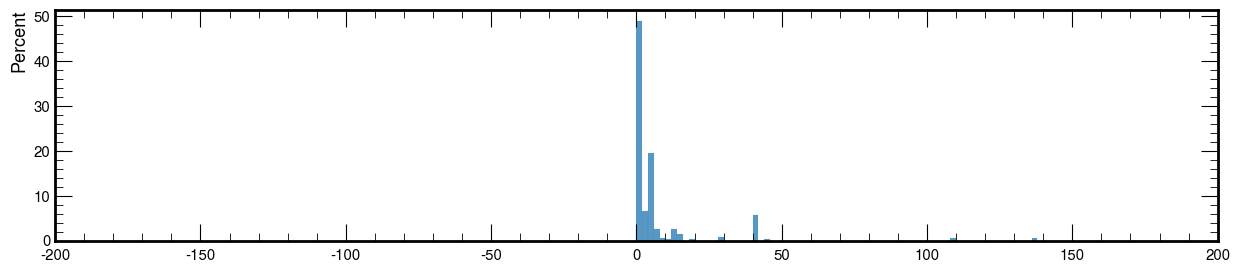

In [27]:
mask = (1*np.array(dic_time["is_overlay_MC"]))==0
plt.figure(figsize=(15,3))
sns.histplot(np.array(dic_time["time_MC_overlay"])[mask], binwidth=2, stat="percent")
plt.legend()
plt.xlim([-200,200])

(0.0, 400.0)

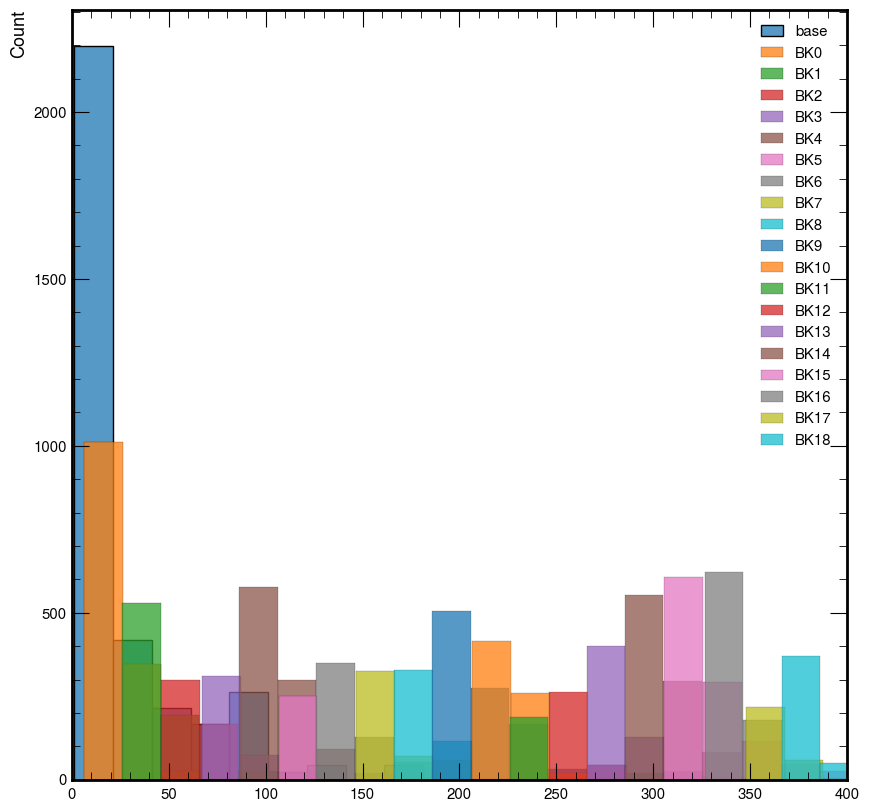

In [27]:
import seaborn as sns
plt.plot(figsize=(1,5))
sns.histplot(dic_time["base"], binwidth=20, label="base")
for i in range(0,19):
    sns.histplot(dic_time[str(i)], binwidth=20, label="BK"+str(i))
plt.legend()
plt.xlim([0,400])

In [29]:
list_all_times = []
for key in dic_time.keys():
    list_all_times.append(dic_time[key])
list_all_times = np.concatenate(list_all_times)

(0.0, 400.0)

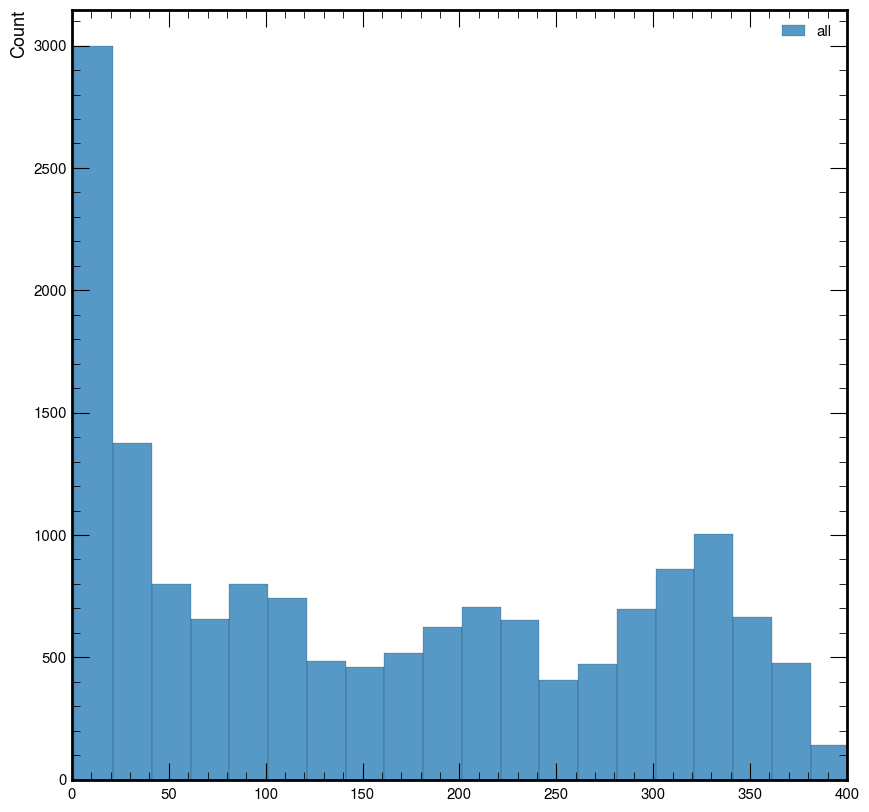

In [30]:
plt.plot(figsize=(1,5))
sns.histplot(list_all_times, binwidth=20, label="all")
plt.legend()
plt.xlim([0,400])

/eos/experiment/fcc/ee/datasets/DC_tracking/Pythia/gun_fakeCalo_g1/reco_gun_1000.root